In [ ]:
#EJERCICIO 1

In [2]:
import random
random.seed(666)
import math

In [3]:
def f(x, y):
    return 2*x**2*y**2 - 6*x*y**2 + 3*y**2 - 1

def g(x, y):
    return (x - 2)**2 + 2*(y-1)**2 + x

def gradient_f(x, y):
    f_x = (4*x - 6)*y**2
    f_y = (4*x**2 - 12*x + 6)*y
    return f_x, f_y

def gradient_g(x, y):
    g_x = 2*x - 3
    g_y = 4*(y - 1)
    return g_x, g_y

In [26]:
def gradient_descent(gradient, 
                     critical_point, 
                     f, 
                     max_iter=100, 
                     epsilon=1e-5, 
                     initial=None, 
                     lr=0.01):
    if initial is None:
        initial = random.random(), random.random()
    actual_min = f(*critical_point)
    xn, yn = initial
    
    for iter in range(max_iter):
        grad_x, grad_y = gradient(xn, yn)
        xn, yn = (xn - lr * grad_x, yn - lr*grad_y)
        estimated_min = f(xn, yn)
        print(f"{iter=:2} aprox_{iter} = ({xn=:}, {yn=:}) {actual_min}==?{estimated_min} ")
        if abs(actual_min - estimated_min) < epsilon:
            print(f"*** Convergence achieved *** at {iter=:}")
            break

In [27]:
gradient_descent(gradient_g, (1.5, 1), g, max_iter=150, lr=0.05)

iter= 0 aprox_0 = (xn=0.5335888693433923, yn=0.6007838025897099) 1.75==?3.0026976180064464 
iter= 1 aprox_1 = (xn=0.6302299824090531, yn=0.6806270420717679) 1.75==?2.7104980560118124 
iter= 2 aprox_2 = (xn=0.7172069841681479, yn=0.7445016336574144) 1.75==?2.493323736042586 
iter= 3 aprox_3 = (xn=0.7954862857513331, yn=0.7956013069259316) 1.75==?2.329897225025227 
iter= 4 aprox_4 = (xn=0.8659376571761997, yn=0.8364810455407452) 1.75==?2.205511951522102 
iter= 5 aprox_5 = (xn=0.9293438914585798, yn=0.8691848364325961) 1.75==?2.1098736082539706 
iter= 6 aprox_6 = (xn=0.9864095023127217, yn=0.8953478691460769) 1.75==?2.035679336299199 
iter= 7 aprox_7 = (xn=1.0377685520814495, yn=0.9162782953168616) 1.75==?1.977676559114981 
iter= 8 aprox_8 = (xn=1.0839916968733045, yn=0.9330226362534892) 1.75==?1.9320348427792173 
iter= 9 aprox_9 = (xn=1.1255925271859741, yn=0.9464181090027914) 1.75==?1.8959229937846591 
iter=10 aprox_10 = (xn=1.1630332744673768, yn=0.9571344872022332) 1.75==?1.8672214784

In [28]:
#EJERCICIO 2

In [89]:
gradient_descent(gradient_g, (1.5, 0), f, max_iter=150, lr=0.001, epsilon=1e-2)

iter= 0 aprox_0 = (xn=0.6685453880441069, yn=0.10649677226987594) -1.0==?-1.0013311190024212 
*** Convergence achieved *** at iter=0


In [90]:
# EJERCICIO 4

(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Accuracy: 0.9736842105263158


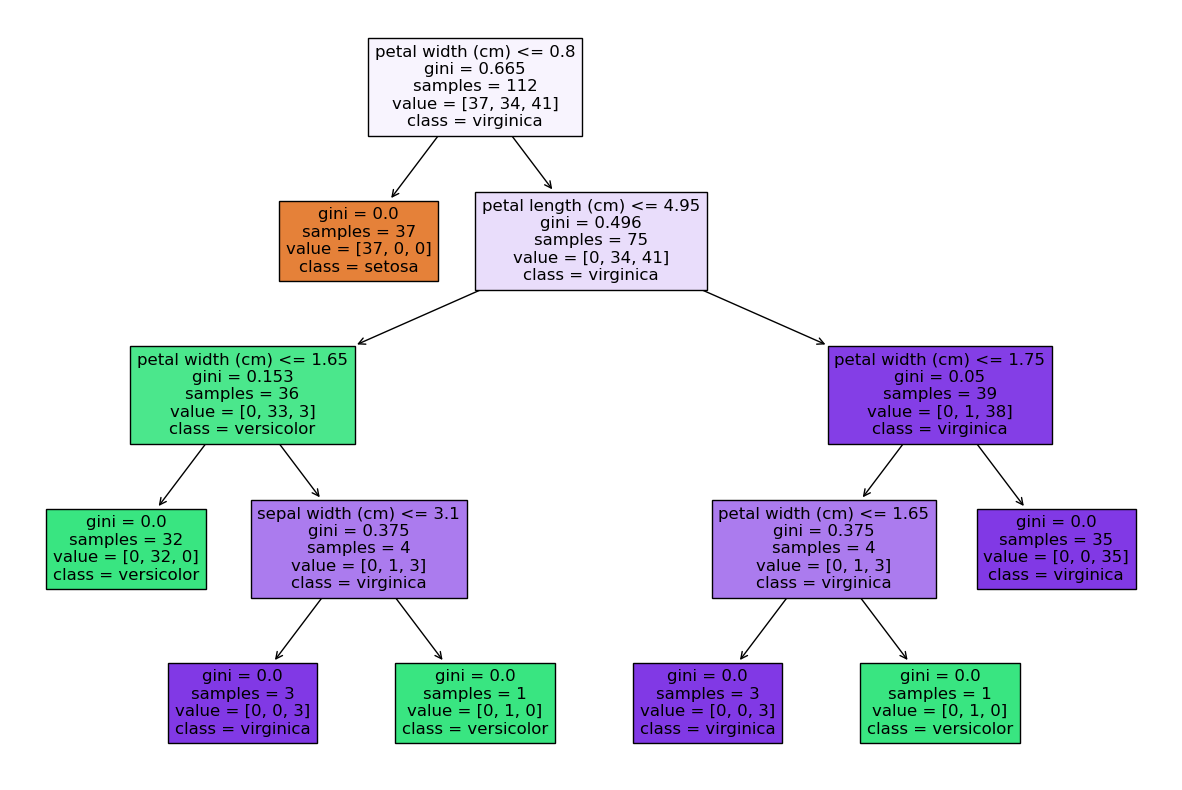

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()



df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.to_csv('iris.csv')

print(df.shape)
print(df.head())

df['target'] = iris.target

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=[n for n in iris.target_names],
                   filled=True)
plt.show()